In [1]:
import pandas as pd
import numpy as np
from kneed import KneeLocator
import sys
infile='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/rankspace_idea/debug/Tregs_CpGdelta_info_faster.txt_3000_forheatunderlyingdata_ranked.txt'

indf=pd.read_csv(infile,sep='\t')
indf.reset_index(inplace=True)

col='(Minimum delta rank+Average delta rank)/2'

indf.head()

,index,chrom,start,end,Average delta rank,Minimum delta rank,Tregs-Bcell,Tregs-Myloid,Tregs-NK,Tregs-Naive CD4 T,...,Tregs-CD4 TCM,Tregs-CD8 TCM,Tregs-CD8 TEMRA,Tregs-CD4 TEM,Tregs-CD8 TEM,Minimum delta,Maximum delta,Average delta,(Minimum delta+Average delta)/2,(Minimum delta rank+Average delta rank)/2
0,0,chrX,49260634,49260636,1,0,0.827625,0.900875,0.890667,0.866333,...,0.8230,0.9305,0.8995,0.8330,0.9095,0.823000,0.9305,0.883485,0.853242,0.5
1,1,chr5,180312122,180312124,2,3,0.755500,0.896818,0.844500,0.901333,...,0.9750,0.9220,1.0000,0.8975,0.7910,0.755500,1.0000,0.880059,0.817780,2.5
2,2,chr18,3898035,3898037,3,2,0.759000,0.896643,0.924000,0.907000,...,0.8815,0.8335,0.9065,0.8940,0.8890,0.759000,0.9240,0.879013,0.819006,2.5
3,3,chr2,235763066,235763068,0,6,0.740714,0.822571,0.944500,0.871333,...,0.9200,0.9645,0.9165,0.8000,1.0000,0.740714,1.0000,0.890920,0.815817,3.0
4,4,chrX,49260621,49260623,7,1,0.823250,0.903937,0.906000,0.827000,...,0.7725,0.8580,0.8605,0.8020,0.8690,0.772500,0.9060,0.852724,0.812612,4.0


In [2]:
indf['log10'+col]= np.log10(indf[col])

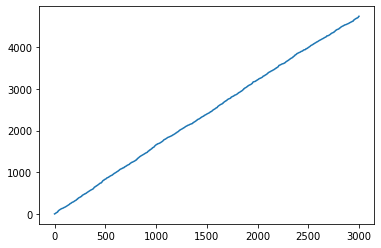

In [3]:
indf[col].plot()

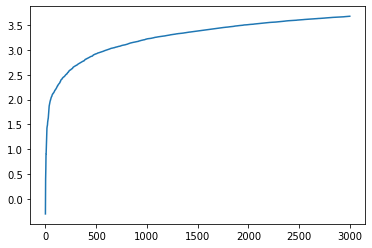

In [4]:
indf['log10'+col].plot()

In [5]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [6]:
indf['log10'+col+'_normalized']=NormalizeData(indf['log10'+col])

indf['Norm_index']=NormalizeData(indf['index'])

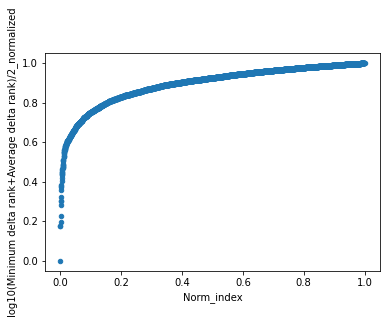

In [9]:
indf.plot.scatter(y='log10'+col+'_normalized',x='Norm_index')

In [ ]:
kn = KneeLocator(y=indf['log10'+col], x=indf.index.tolist(), curve='concave', direction='increasing',S=4.0)
print(kn.knee)
kn.plot_knee()


In [ ]:
kn.plot_knee_normalized()